In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA 
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Load the main dataset 
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,...,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,...,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,...,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,...,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,...,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [3]:
df.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished'],
      dtype='object')

In [4]:
# James: Convert date columns to datetime format for easier analysis

# BorrowDate:  MM/DD/YYYY (Keep dayfirst=False)
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# problematic columns: Use format='mixed' to handle the mix of DD/MM/YYYY and YYYY-MM-DD
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True, format='mixed')
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True, format='mixed')

# ClearDate:  YYYY-MM-DD
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")

# Check the result
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,...,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,...,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,...,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,...,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,...,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [5]:
# James: More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.

df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

In [6]:
# More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.
df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

# The data logs the same loan twice. We keep only the first instance.
df = df.drop_duplicates(subset=['CustomerId', 'BorrowDate'], keep='first')

# A loan cannot be cleared BEFORE it was borrowed.
df = df[df['ClearDate'] >= df['BorrowDate']].copy()

# A business established in 2024 cannot borrow money in 2023.
df = df[df['YearEstablished'] <= df['BorrowDate'].dt.year].copy()

# Cleanup to remove Product types (sme - 3 months, sme - 4 months and 12 weeks credit ease) fron the dataset
df = df[~df['Product'].isin(['sme - 3 months', 'sme - 4 months', '12 weeks credit ease'])]
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 0 to 3469
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        1565 non-null   int64         
 1   AmountDisbursed               1565 non-null   int64         
 2   Interest                      1565 non-null   int64         
 3   LoanBalance                   1565 non-null   float64       
 4   BorrowDate                    1565 non-null   datetime64[ns]
 5   Product                       1565 non-null   object        
 6   Branch                        1565 non-null   object        
 7   ClearDate                     1565 non-null   datetime64[ns]
 8   CustomerId                    1565 non-null   int64         
 9   Gender                        1565 non-null   object        
 10  LoanLimit                     1565 non-null   float64       
 11  CreditScore                   1565 

(1565, 22)

Number of defaulters: 133
Percentage of Defaults vs Non-Defaults:
 0    91.501597
1     8.498403
Name: proportion, dtype: float64


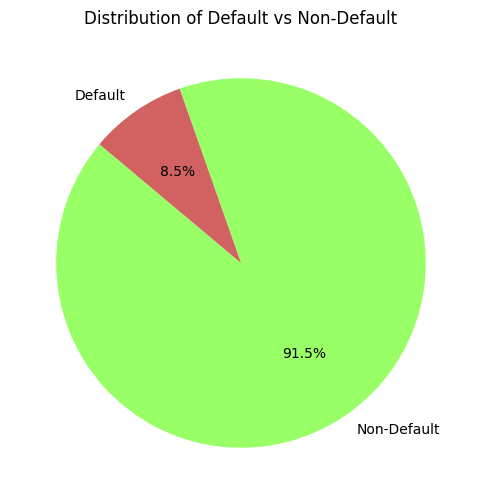

In [7]:
## Additional data cleaning

# James
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)

# Visualize the distribution of the target variable as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()

In [8]:
# James
# Introduce bool (1,0) for isDefault
df['IsDefault'] = defaulters

In [9]:
df.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished', 'days_to_first', 'IsDefault'],
      dtype='object')

In [10]:
# Make a copy to do feature engineering 
data = df.copy()

# FEATURE ENGINEERING

This dataset captures the full loan lifecycle of microfinance customers, combining customer demographics, business attributes, loan characteristics, and repayment behavior.

**Problem statement: How can we predict and manage default risk in microfinance by leveraging customer history, loan characteristics, and repayment behavior?**
- Which customer behaviors (missed instalments, repayment frequency, overpayments) are strongest predictors of default?
- How does loan experience (cycle count) affect repayment risk?
- Are certain loan products (5-week vs 7-week vs 10-week) inherently riskier?
- Can we optimize loan limits and approval thresholds to balance growth and risk?
- Do customers who pay late but repay in full represent higher capacity or higher risk?

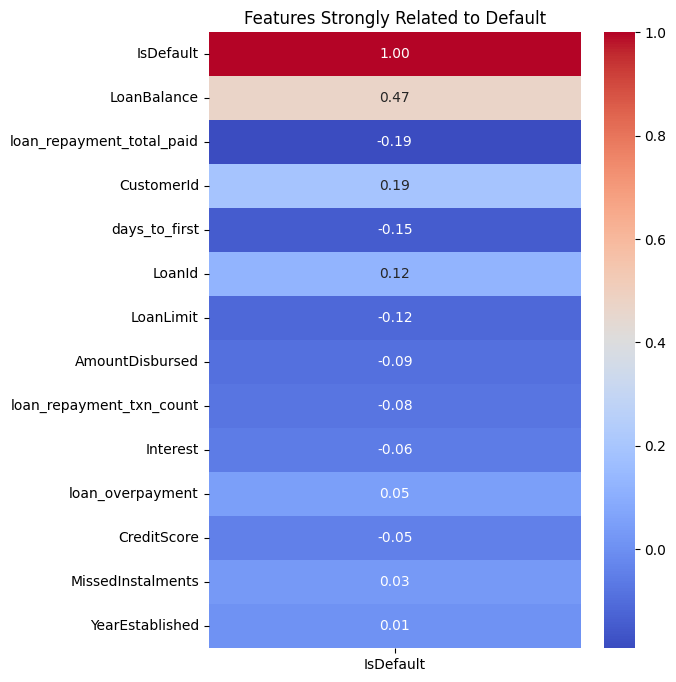

In [11]:
corr = data.select_dtypes(include='number').corr()

target_corr = corr['IsDefault'].sort_values(key=abs, ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Features Strongly Related to Default')
plt.show()

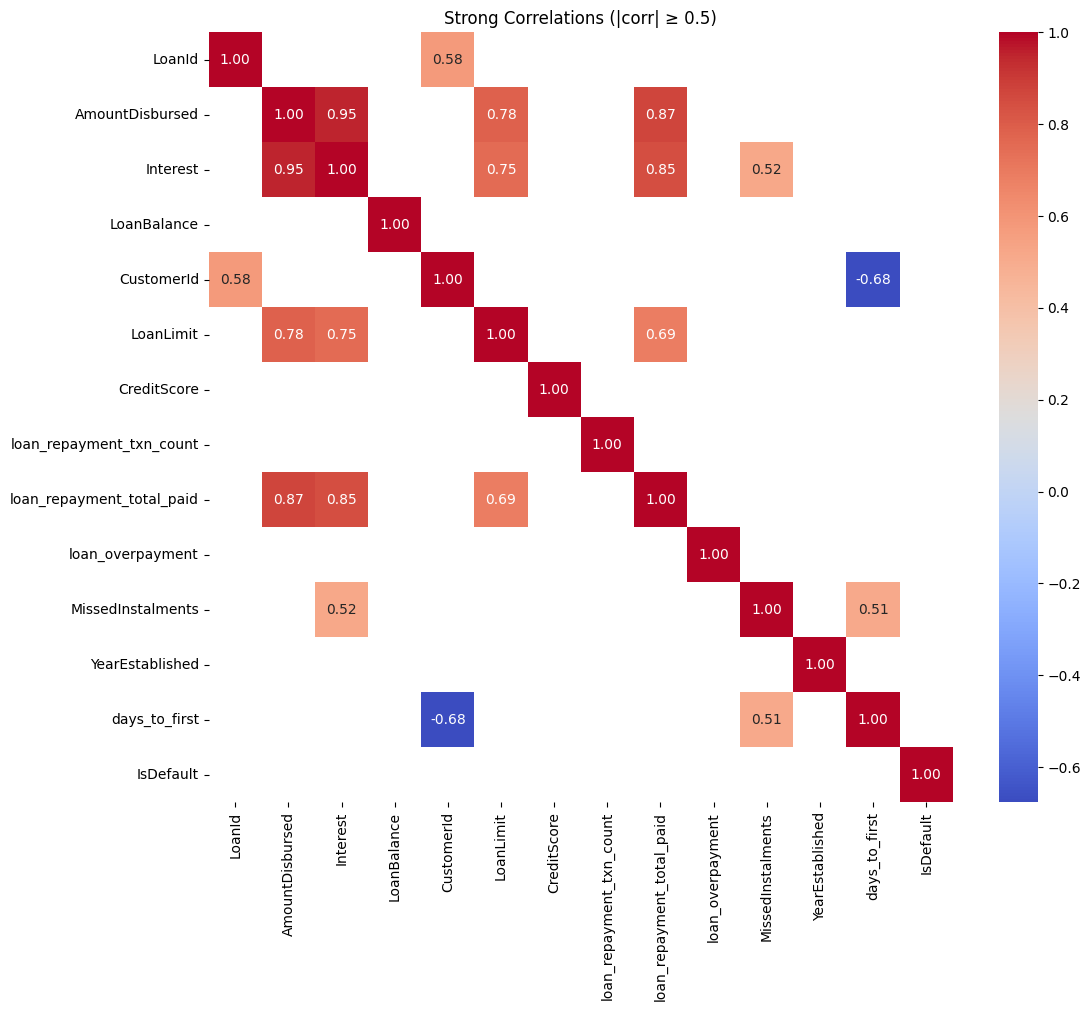

In [12]:
# Correlation Heatmap 
corr = data.select_dtypes(include='number').corr()
threshold = 0.5

strong_corr = corr.where(abs(corr) >= threshold)

plt.figure(figsize=(12, 10))
sns.heatmap(
    strong_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    mask=strong_corr.isna()
)
plt.title(f'Strong Correlations (|corr| ≥ {threshold})')
plt.show()


**New relationships to look into:**

- Loan Utilization: **df['AmountDisbursed'] & df['LoanLimit']** - Customers borrowing close to their limit → higher stress
- Repayment intensity: **df['loan_repayment_txn_count'] & df['RepaymentDuration']** - frequent small repayments (good discipline)

## **1. Handle categorical features**

In [13]:
df.select_dtypes(include='category').columns
categorical_features = df.select_dtypes(
    include=['object', 'category']
).columns.tolist()

categorical_features

['Product', 'Branch', 'Gender', 'Industry', 'BusinessType']

**Exploration of categorical features**

In [14]:
print("Branch:", data["Branch"].unique())
print("Product:", data["Product"].unique()) #should extract only the number 

Branch: ['engineer' 'molo']
Product: ['5 weeks credit ease' '7 weeks credit ease' '10 weeks credit ease']


In [15]:
print("Industry:", data["Industry"].unique())
print(data["Industry"].value_counts())

Industry: ['food & hospitality' 'business & information'
 'natural resources/environmental' 'personal services'
 'wholesale & retail trade' 'transportation'
 'general hardware & electronics' 'fashion & beauty products'
 'automobile services' 'manufacturing' 'agriculture'
 'hospitality & tourism' 'finance & insurance'
 'agriculture, forestry & fishing' 'human health & animal services'
 'real estate & housing' 'not defined' 'personal & professional services'
 'construction & real estate' 'education']
Industry
food & hospitality                  923
fashion & beauty products           157
personal services                   128
agriculture                          65
transportation                       42
wholesale & retail trade             37
natural resources/environmental      37
general hardware & electronics       34
agriculture, forestry & fishing      27
personal & professional services     22
manufacturing                        21
human health & animal services       19
not def

In [16]:
print("BusinessType:", data["BusinessType"].unique())

print(data["BusinessType"].value_counts())

BusinessType: ['green grocery (fruit/vegetables)' 'retail shop'
 'bureau & publishing services' 'firewood & charcoal vendor' 'cereals'
 'hawking- mobile merchandize services' 'food kiosks' 'beauty salon'
 'motor bike transportation' 'building & construction materials'
 'bar/ restaurant' 'meat vendor-butchery' 'tailoring services'
 'not defined' 'taxi & rental services' 'seafood- fish vendor'
 'entertainment/party & events planning' 'footware shop' 'barber shop'
 'second hand clothes' 'cosmetic shop' 'farming-animal products' 'caterer'
 'farming-crop products (coconuts etc)' 'household utensils' 'new clothes'
 'mobile money services-mpesa' 'pharmacy/dispensing chemist' 'other'
 'workshop (wood & metal)' 'agro-vet' 'bakery (bread & confectionaries)'
 'motor vehicle/bike repair' 'electronic accessory shops/repairs'
 'private health services' 'beverage manufacturing- juice etc'
 'oil & gas distribution' 'private school' 'automotive part sales'
 'ice cream' 'dry cleaning/laundry' 'landscape

In [17]:
# Check number of categories before doing encoding 

for col in ["Industry", "BusinessType", "Product", "Branch"]:
    print(col, "→", data[col].nunique())

# Industry → group rare categories into others (make it less than 10) 
# BusinessType → group rare categories into others (make it less than 20) 
# Product & Branch → one-hot encoding 


Industry → 20
BusinessType → 48
Product → 3
Branch → 2


In [18]:
# Group rare categories into "Other"

# BusinessType 
business_type = data['BusinessType'].value_counts()
rare = business_type[business_type < 20].index #keep the categories that have the values > 20 

data['BusinessType_clean'] = data['BusinessType'].replace(rare, 'Other')

In [19]:
# Industry
industry_count = df['Industry'].value_counts()
rare = industry_count[industry_count < 20].index #keep the categories that have the values > 20 

data['Industry_clean'] = data['Industry'].replace(rare, 'Other')

In [20]:
data = pd.get_dummies(
    data,
    columns=['BusinessType_clean', 'Industry_clean', 'Product', 'Branch', 'Gender'],
    drop_first=True
)

data = data.drop(columns=['Industry', 'BusinessType'])

In [21]:
data.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,ClearDate,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,...,Industry_clean_manufacturing,Industry_clean_natural resources/environmental,Industry_clean_personal & professional services,Industry_clean_personal services,Industry_clean_transportation,Industry_clean_wholesale & retail trade,Product_5 weeks credit ease,Product_7 weeks credit ease,Branch_molo,Gender_male
0,951920,6000,1750,7750.0,2025-11-29,2026-03-01,1819,8000.0,3500,1,...,False,False,False,False,False,False,True,False,False,False
1,951902,4000,1250,5250.0,2025-11-28,2026-02-01,1818,9600.0,2500,1,...,False,False,False,False,False,False,True,False,True,False
2,949962,4000,1250,5250.0,2025-11-26,2025-12-31,1815,8000.0,3500,1,...,False,False,False,False,False,False,True,False,False,False
3,949189,4000,1250,5250.0,2025-11-25,2025-12-30,1814,10000.0,1500,1,...,False,False,False,False,False,False,True,False,True,False
4,948984,4000,1250,5250.0,2025-11-24,2025-12-29,1813,10000.0,1500,1,...,False,False,False,False,False,False,True,False,True,False


In [22]:
data.shape 

#50 columns

(1565, 50)

In [23]:
data.isnull().sum()

## None

LoanId                                                     0
AmountDisbursed                                            0
Interest                                                   0
LoanBalance                                                0
BorrowDate                                                 0
ClearDate                                                  0
CustomerId                                                 0
LoanLimit                                                  0
CreditScore                                                0
loan_repayment_txn_count                                   0
loan_repayment_total_paid                                  0
loan_repayment_first_payment                               0
loan_repayment_last_payment                                0
loan_overpayment                                           0
MissedInstalments                                          0
YearEstablished                                            0
days_to_first           

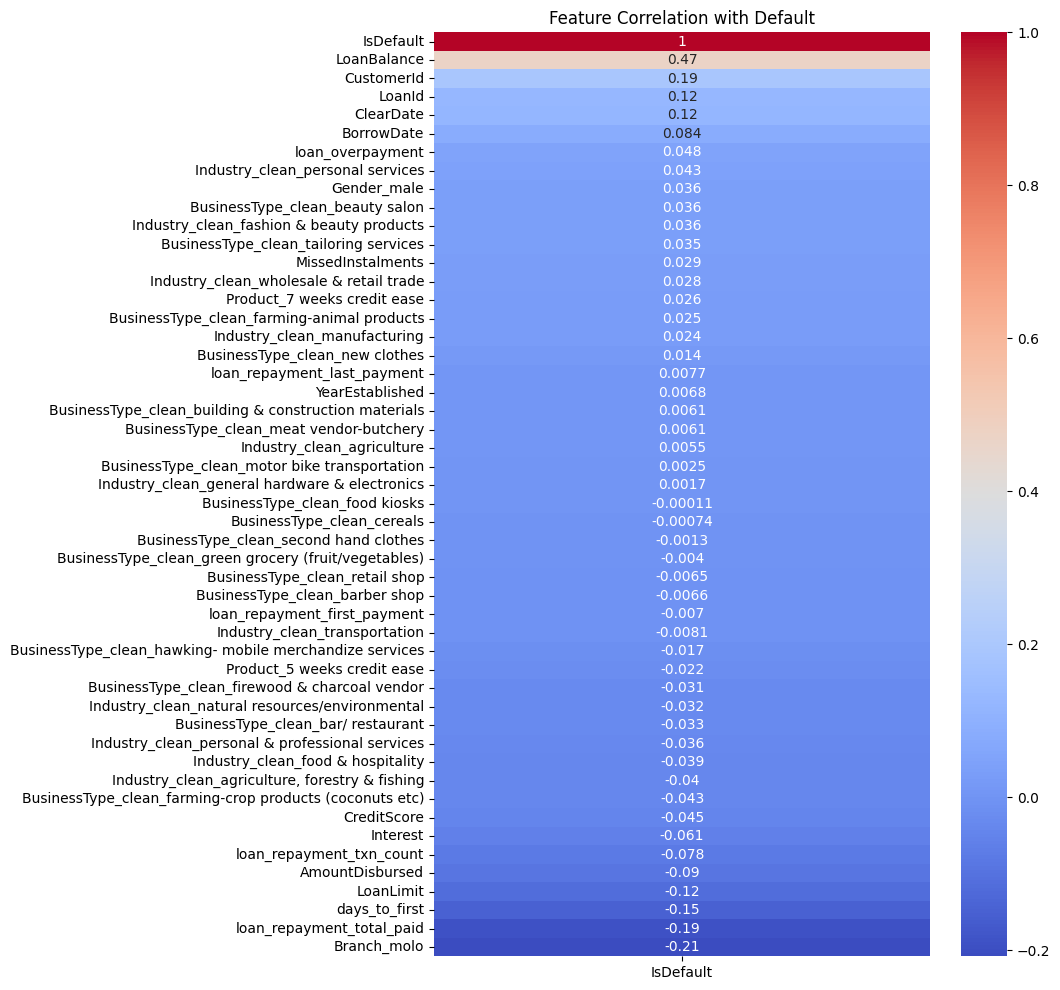

In [24]:
# Heatmap with categorical & numerical features 

corr = data.corr()["IsDefault"].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.heatmap(corr.to_frame(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Default")
plt.show()

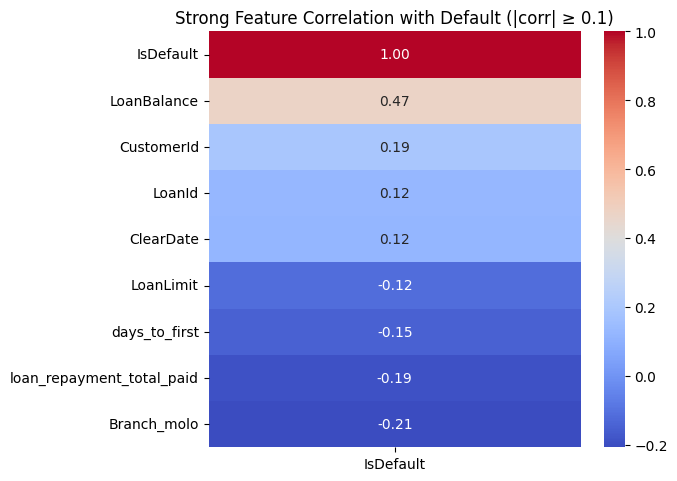

In [25]:
# Showing strong correlation only 
# Correlation with target
corr = data.corr()["IsDefault"]

# Keep only strong relationships
threshold = 0.1
strong_corr = corr[abs(corr) >= threshold].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6, len(strong_corr) * 0.6))
sns.heatmap(
    strong_corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title(f"Strong Feature Correlation with Default (|corr| ≥ {threshold})")
plt.show()


## **2. USE ML to select which features to engineer/keep/drop**


In [26]:
# Make a copy of dataset to do PCA
pca_data = data.copy()

In [27]:
pca_data.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,ClearDate,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,...,Industry_clean_manufacturing,Industry_clean_natural resources/environmental,Industry_clean_personal & professional services,Industry_clean_personal services,Industry_clean_transportation,Industry_clean_wholesale & retail trade,Product_5 weeks credit ease,Product_7 weeks credit ease,Branch_molo,Gender_male
0,951920,6000,1750,7750.0,2025-11-29,2026-03-01,1819,8000.0,3500,1,...,False,False,False,False,False,False,True,False,False,False
1,951902,4000,1250,5250.0,2025-11-28,2026-02-01,1818,9600.0,2500,1,...,False,False,False,False,False,False,True,False,True,False
2,949962,4000,1250,5250.0,2025-11-26,2025-12-31,1815,8000.0,3500,1,...,False,False,False,False,False,False,True,False,False,False
3,949189,4000,1250,5250.0,2025-11-25,2025-12-30,1814,10000.0,1500,1,...,False,False,False,False,False,False,True,False,True,False
4,948984,4000,1250,5250.0,2025-11-24,2025-12-29,1813,10000.0,1500,1,...,False,False,False,False,False,False,True,False,True,False


Newly created features: 
- "RepaymentDuration",
- "Prev_MissedInstalments", 
- "Prev_TxnCount", 
- "Loan_Sequence"

In [28]:
# Sort by Customer and Date to ensure correct order
pca_data = pca_data.sort_values(by=['CustomerId', 'BorrowDate'])

# All loans are at least cycle 2 (the first loan is cycle 1, which we have removed during preprocessing)
# Calculate Loan Cycle (Cycle 2, 3, etc.)
pca_data['Loan_Sequence'] = pca_data.groupby('CustomerId').cumcount() + 2

# Look at the PREVIOUS loan's behavior for each customer
pca_data['Prev_MissedInstalments'] = pca_data.groupby('CustomerId')['MissedInstalments'].shift(1)
pca_data['Prev_TxnCount'] = pca_data.groupby('CustomerId')['loan_repayment_txn_count'].shift(1)

# Converting to datetime to ensure accurate calculation
pca_data['BorrowDate'] = pd.to_datetime(pca_data['BorrowDate'])
pca_data['ClearDate'] = pd.to_datetime(pca_data['ClearDate'])

# Repayment duration in days
pca_data['RepaymentDuration'] = (pca_data['ClearDate'] - pca_data['BorrowDate']).dt.days


- PCA is not about trying many feature combinations; it is about compressing redundant measurements of the same underlying concept so that behavioral and temporal signals can be analyzed clearly and engineered effectively.

- These features were selected for PCA because they are highly correlated money-related variables that measure overlapping aspects of financial exposure, making them ideal candidates for dimensionality reduction, while behavioral and temporal features were intentionally excluded to preserve their interpretability.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [30]:
from sklearn.decomposition import PCA

# Select highly correlated money-related features to reduce redundancy
pca_features = ["AmountDisbursed", "Interest", "LoanBalance", "LoanLimit", "loan_repayment_total_paid"]
pca_features = [c for c in pca_features if c in pca_data.columns]

# Build a PCA pipeline: handle missing values, standardize scales, and extract principal components
pca_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=42))
])

pc = pca_pipe.fit_transform(pca_data[pca_features])
pca_data["PC1_money"] = pc[:, 0]
pca_data["PC2_money"] = pc[:, 1]

In [31]:
# KMeans clustering for risk segmentation
#  
seg_features = [
    "AmountDisbursed", "LoanLimit", "CreditScore",
    "MissedInstalments", "loan_repayment_txn_count",
    "loan_repayment_total_paid", "RepaymentDuration",
    "Prev_MissedInstalments", "Prev_TxnCount", "Loan_Sequence"
]
seg_features = [c for c in seg_features if c in pca_data.columns]

seg_data = pca_data[seg_features].copy()

seg_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=4, random_state=42, n_init="auto"))
])

pca_data["RiskCluster"] = seg_pipe.fit_predict(seg_data)

**A risk cluster** is a group of customers who look similar in terms of loan size, repayment behavior, and borrowing history — and therefore tend to have similar default risk.

**Goal**: Find a high-risk customer type --> define which features to engineer to help find this high-risk customer type

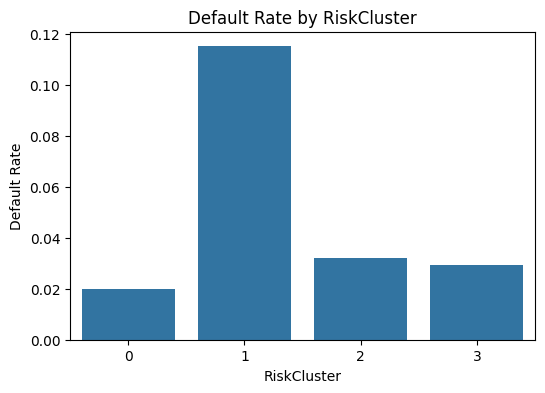

In [32]:
# Compute the average default rate for each risk cluster
cluster_summary = pca_data.groupby("RiskCluster")["IsDefault"].mean().reset_index()
# For each cluster of similar customers, how often do they default?

# Visualize default rates across clusters
plt.figure(figsize=(6,4))
sns.barplot(
    data=cluster_summary,
    x="RiskCluster",
    y="IsDefault"
)
plt.title("Default Rate by RiskCluster")
plt.ylabel("Default Rate")
plt.show()


In [33]:
# Cluster profile (median characteristics)
cluster_profile = (
    pca_data.groupby("RiskCluster")[seg_features + ["IsDefault"]]
        .median()
        .sort_values("IsDefault", ascending=False))

cluster_profile

,AmountDisbursed,LoanLimit,CreditScore,MissedInstalments,loan_repayment_txn_count,loan_repayment_total_paid,RepaymentDuration,Prev_MissedInstalments,Prev_TxnCount,Loan_Sequence,IsDefault
RiskCluster,,,,,,,,,,,
0,9000.0,14000.0,2000.0,5.0,12.0,10575.0,6.0,5.0,13.0,7.0,0.0
1,5000.0,10000.0,2000.0,3.0,6.0,6500.0,13.0,1.0,7.0,2.0,0.0
2,18000.0,30700.0,20000.0,7.0,14.0,24650.0,30.0,7.0,12.0,4.0,0.0
3,18000.0,32450.0,2500.0,7.0,12.0,23000.0,27.0,7.0,10.0,4.0,0.0


→ This table shows the typical customer in each risk cluster, and by comparing their loan size, repayment behavior, and history, we can identify which behavioral patterns are associated with higher default risk.

**Cluster 1: These borrowers are small-ticket, low-engagement, early-cycle clients**

**Insights: AmountDisbursed ↓ loan_repayment_txn_count ↓ RepaymentDuration ↓ MissedInstalments**
--> Smaller loans, low repayment activity, short repayment duration → fragile borrowers
--> Defaults concentrate among customers with low repayment engagement and short repayment histories, rather than purely high loan amounts.


--> we engineered a small set of behavior-normalized features (repayment intensity, missed rate, early payment delay, and loan utilization) that directly encode the risk patterns observed in high-default clusters.

**Features to be engineered to reflect above relationships:**
- repayment engagement: df["Txn_Intensity"] = df["loan_repayment_txn_count"] / (df["RepaymentDuration"] + 1) - captures low repayment activity normalized by time (3 payments in 10 days ≠ 3 payments in 60 days)
- missed_rate: df["Missed_Rate"] = df["MissedInstalments"] / (df["loan_repayment_txn_count"] + 1)
- _late first payment (for early warning):_ df["Late_First_Payment"] = (df["days_to_first"] > 7).astype(int)
- Loan Utilization: df['AmountDisbursed'] & df['LoanLimit'] - Customers borrowing close to their limit → higher stress

In [34]:
# Repayment engagement: How actively a customer is repaying their loan over time.
# tells us who is paying regularly vs. dragging payments (3 payments in 10 days and 3 payments in 60 days)

pca_data["Txn_Intensity"] = pca_data["loan_repayment_txn_count"] / (pca_data["RepaymentDuration"] + 1)
# Higher value = healthier repayment behavior

In [35]:
# Missed Rate: How unreliable a customer is relative to how often they repay.
# Take the number of missed repayments, divide by total repayment activity
# Measures missed payments as a proportion, avoids over-penalizing active payers (miss 2 payments out of 3 & miss 2 payments out of 20 payments)

pca_data["Missed_Rate"] = pca_data["MissedInstalments"] / (pca_data["loan_repayment_txn_count"] + 1)
# Higher value = more unreliable repayment behavior

In [36]:
# Late First Payment: Did the customer struggle right at the start?
# Measure how many days passed before the first repayment, if it exceeds a reasonable grace period (e.g. 7 days)
# Flag the customer as “late starter”

pca_data["Late_First_Payment"] = (pca_data["days_to_first"] > 7).astype(int)

In [37]:
# Loan Utilization: How close a customer is borrowing to their maximum allowed limit.
# Customers near their limit are under higher financial stress.

pca_data["Loan_Utilization"] = (pca_data["AmountDisbursed"] / (pca_data["LoanLimit"] + 1))

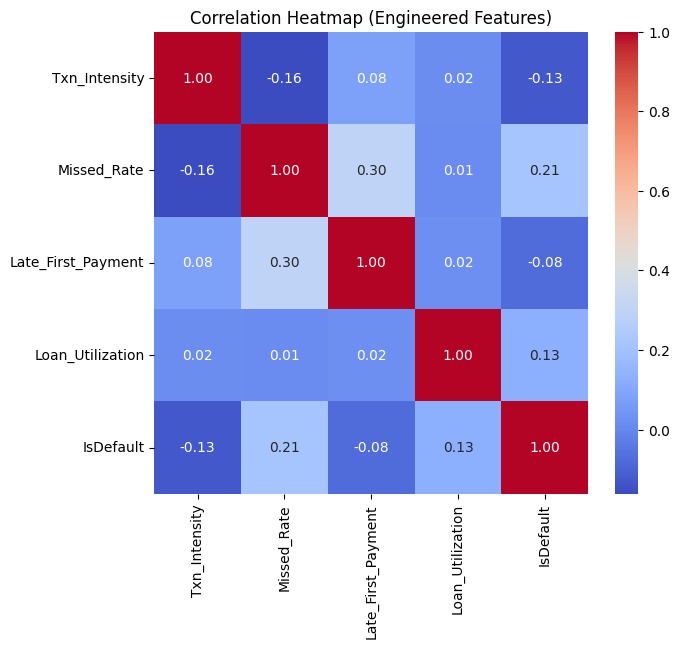

In [38]:
# Heatmap on featured columns
feature_cols = [
    "Txn_Intensity",
    "Missed_Rate",
    "Late_First_Payment",
    "Loan_Utilization",
    "IsDefault"
]

corr_data = pca_data[feature_cols].corr()

# Plotting
plt.figure(figsize=(7,6))
sns.heatmap(
    corr_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (Engineered Features)")
plt.show()

In [48]:
pca_data.rename(columns={"PC2_money": "Repayment_Pressure"}, inplace=True)

Repayment_Pressure captures the combined effect of loan balance, interest burden, repayment progress, and loan limits, and shows a stronger relationship with default than raw loan size variables.

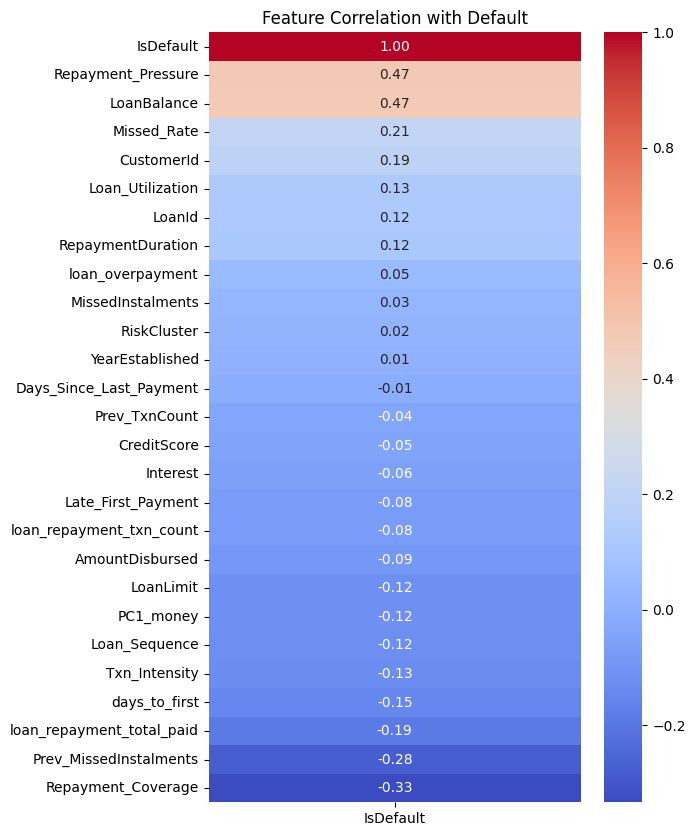

In [50]:
target_corr = corr[["IsDefault"]].sort_values("IsDefault", ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    target_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation with Default")
plt.show()

**Risk is driven more by repayment stress than loan size**

- Repayment_Pressure: principal component created by PCA from these original features ["AmountDisbursed", "Interest", "LoanBalance", "LoanLimit", "loan_repayment_total_paid"]

- Missed behavior matters more than raw missed counts: Missed_Rate (0.21) correlates more with default than MissedInstalments (0.03)

- Negative correlations ("Txn_Intensity", "Loan_Sequence", "days_to_first", Prev_MissedInstalments) mean Experienced borrowers who repay actively and early are less likely to default.

- CreditScore (-0.05) shows only a mild relationship.

- CustomerId (0.19), LoanId (0.12), Branch_Code (-0.21) not causal and should not be used directly for modeling.


**KEEP (high value)**
- Repayment_Pressure or LoanBalance (not both)

PC2_money = ["AmountDisbursed", "Interest", "LoanBalance", "LoanLimit", "loan_repayment_total_paid"]

- Missed_Rate
- Loan_Utilization
- Txn_Intensity
- days_to_first
- Loan_Sequence
- Prev_MissedInstalments

**DROP / DE-PRIORITIZE**
- Raw MissedInstalments
- Raw AmountDisbursed
- Interest
- Branch_Code

**More to look into:** RFM (Recency–Frequency–Monetary) framework

- Recency of payment: Days_Since_Last_Payment = (ReferenceDate - loan_repayment_last_payment).days

- Txn_Intensity

- Repayment coverage: How much of the loan has actually been repaid?

In [42]:
# Reference date (use max BorrowDate as a consistent "snapshot" date)
# If BorrowDate is missing, fallback to today's date.
ref_date = pca_data["BorrowDate"].max()
if pd.isna(ref_date):
    ref_date = pd.Timestamp.today().normalize()


In [43]:
# Recency: days since last payment
pca_data["Days_Since_Last_Payment"] = (ref_date - pca_data["loan_repayment_last_payment"]).dt.days

In [44]:
# Repayment coverage 
pca_data["Repayment_Coverage"] = (
    pca_data["loan_repayment_total_paid"] / (pca_data["AmountDisbursed"] + 1)
)

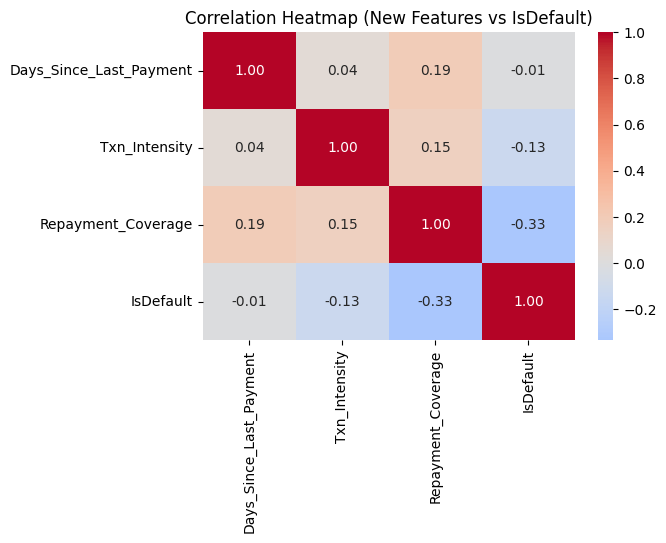

In [47]:
features_to_check = [
    "Days_Since_Last_Payment",
    "Txn_Intensity",
    "Repayment_Coverage",
    "IsDefault"]


features_to_check = [c for c in features_to_check if c in pca_data.columns]

corr = pca_data[features_to_check].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlation Heatmap (New Features vs IsDefault)")
plt.show()


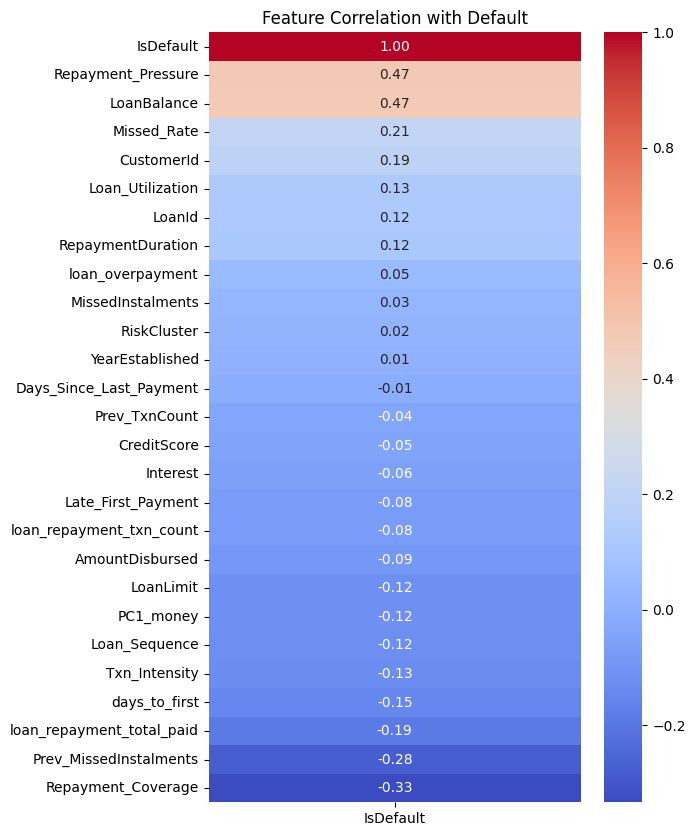

In [51]:
target_corr = corr[["IsDefault"]].sort_values("IsDefault", ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    target_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation with Default")
plt.show()

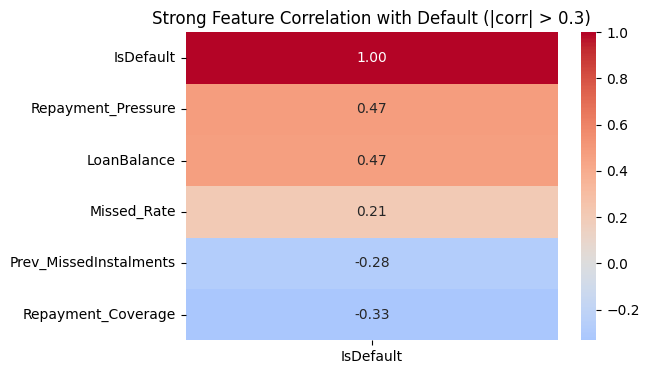

In [53]:
# Correlation with target
target_corr = corr[["IsDefault"]]

# Filter by absolute correlation threshold
threshold = 0.2
target_corr_strong = target_corr[target_corr["IsDefault"].abs() > threshold] \
    .sort_values("IsDefault", ascending=False)

# Plot
plt.figure(figsize=(6, max(4, len(target_corr_strong) * 0.6)))
sns.heatmap(
    target_corr_strong,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    center=0
)
plt.title("Strong Feature Correlation with Default (|corr| > 0.3)")
plt.show()